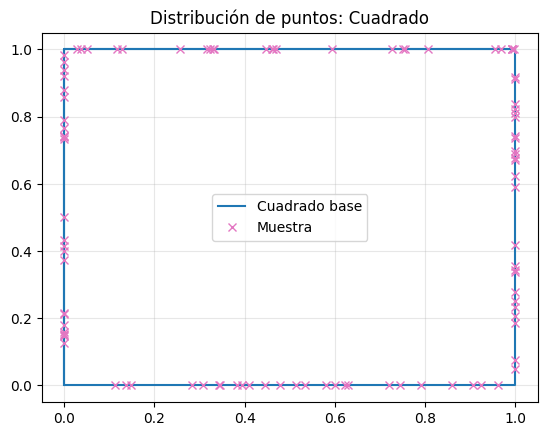

In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np

# Muestreo de puntos sobre el cuadrado
x1 = [(0,np.random.rand()) for i in range(25)]
x2 = [(np.random.rand(),0) for i in range(25)]
x3 = [(1,np.random.rand()) for i in range(25)]
x4 = [(np.random.rand(),1) for i in range(25)]
full_muestra = x1+x2+x3+x4
full_x = [_[0] for _ in full_muestra]
full_y = [_[1] for _ in full_muestra]

# --------------------
# Cuadrado.
x = np.linspace(0,1,100)
y = np.zeros(100)

c1 = [(y[i], x[i]) for i in range(100)]
c2 = [(x[i], y[i]) for i in range(100)]
c3 = [(y[i] + 1, x[i]) for i in range(100)]
c4 = [(x[i], y[i] + 1) for i in range(100)]

full_cuad = c1+c2+c3+c4
cuad_x = [_[0] for _ in full_cuad]
cuad_y = [_[1] for _ in full_cuad]

fig, ax = plt.subplots()
ax.plot(cuad_x, cuad_y, color = 'tab:blue', label = 'Cuadrado base')
ax.plot(full_x, full_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.grid(True, alpha = 0.3)
ax.legend()
ax.set_title('Distribución de puntos: Cuadrado')
plt.show()

In [2]:
def farthest_first_traversal(muestra):
    fft = []
    aux = muestra.copy()
    full_len = len(aux)
    while len(fft) < full_len - 1:
        if len(fft) == 0:
            random.shuffle(aux)
            print('Valor inicial: {}'.format(aux[-1]))
            current_value = aux.pop()
        else:
            current_value = fft[-1]
        max_dist = 0
        biggest_index = None

        for i in range(len(aux)):
            dist = np.linalg.norm(np.array(current_value) - np.array(aux[i]))
            if dist > max_dist:
                max_dist = dist
                biggest_index = i
        fft.append(aux[biggest_index])
        aux.pop(biggest_index)
    return fft

In [3]:
def distance_random_k(muestra, k):
    """
    k = int (k > 0)
    """
    avg_dist = 0
    for i in range(k):
        print('Iteración {}'.format(i))
        fft_square = farthest_first_traversal(muestra)
        fft_x = [_[0] for _ in fft_square]
        fft_y = [_[1] for _ in fft_square]
    
        full_distance = 0
        for i in range(1,len(fft_x)-1):
            full_distance += round(math.sqrt((fft_x[i-1] - fft_x[i])**2 + (fft_y[i-1] - fft_y[i])**2), 2)
        print('Distancia total: {}'.format(full_distance))
        avg_dist += full_distance
    print('Distancia promedio: {}'.format(round(avg_dist/k, 3)))
    return fft_x, fft_y

In [4]:
print('Cuadrados')
fftx, ffty = distance_random_k(full_muestra, 3)

Cuadrados
Iteración 0
Valor inicial: (0.9614559861902293, 0)
Distancia total: 110.43
Iteración 1
Valor inicial: (1, 0.049316429178604126)
Distancia total: 110.45
Iteración 2
Valor inicial: (0, 0.7887531268647457)
Distancia total: 110.58999999999997
Distancia promedio: 110.49


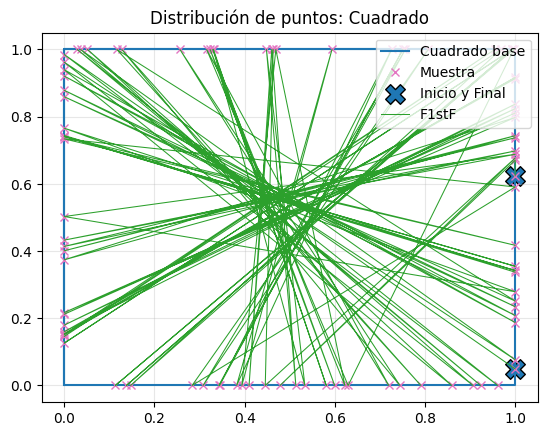

In [5]:
fig, ax = plt.subplots()
ax.plot(cuad_x, cuad_y, color = 'tab:blue', label = 'Cuadrado base')
ax.plot(fftx, ffty, 'x', color = 'tab:pink', label = 'Muestra')
ax.scatter([fftx[-1], fftx[0]], [ffty[-1], ffty[0]], marker = 'X', s=200, edgecolors = 'black', linewidths = 1, label = 'Inicio y Final')
ax.plot(fftx, ffty, color = 'tab:green', label = 'F1stF', linewidth = 0.75)
ax.grid(True, alpha = 0.3)
ax.legend(loc = 'upper right')
ax.set_title('Distribución de puntos: Cuadrado')
plt.show()

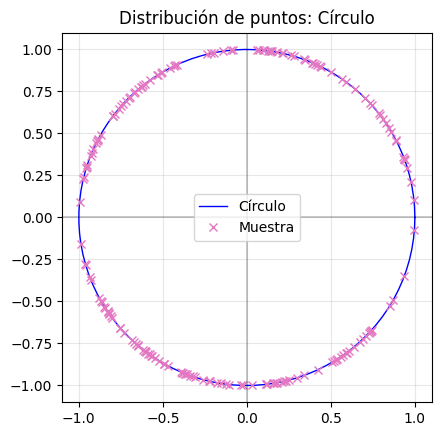

In [6]:
# Puntos sobre la bola.
bola = []
while len(bola) < 180:
    p = np.random.rand()
    p1 = np.random.rand()
    if p > 0.5:
        x = np.random.rand()
    else:
        x = -np.random.rand()
    y = math.sqrt(1 - (x**2))
    if p1 > 0.5:
        y = -y
    bola.append((x,y))

b_x = [_[0] for _ in bola]
b_y = [_[1] for _ in bola]

# Graficación de los puntos.
fig, ax = plt.subplots()
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

ax.plot(x, y, 'b-', linewidth=1, label = 'Círculo')
ax.plot(b_x, b_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.set_title('Distribución de puntos: Círculo')

ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.3)
ax.axvline(x=0, color='k', linewidth=0.3)
ax.legend()
plt.show()

In [7]:
print('Círculos')
fftx_cir, ffty_cir = distance_random_k(bola, 3)

Círculos
Iteración 0
Valor inicial: (-0.80112972932985, -0.5984907324126926)
Distancia total: 333.76000000000005
Iteración 1
Valor inicial: (0.26365846404005644, 0.9646160968696501)
Distancia total: 330.33
Iteración 2
Valor inicial: (0.0960179130254627, 0.9953796061695431)
Distancia total: 330.33000000000004
Distancia promedio: 331.473


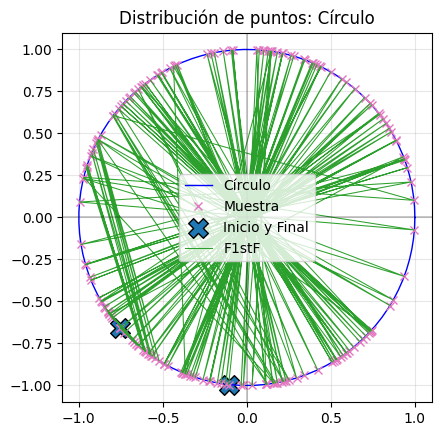

In [8]:
fig, ax = plt.subplots()
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

ax.plot(x, y, 'b-', linewidth=1, label = 'Círculo')
ax.plot(b_x, b_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.scatter([fftx_cir[-1], fftx_cir[0]], [ffty_cir[-1], ffty_cir[0]], marker = 'X', s=200, edgecolors = 'black', linewidths = 1, label = 'Inicio y Final')
ax.plot(fftx_cir, ffty_cir, color = 'tab:green', label = 'F1stF', linewidth = 0.75)
ax.set_title('Distribución de puntos: Círculo')

ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.3)
ax.axvline(x=0, color='k', linewidth=0.3)
ax.legend()
plt.show()

In [9]:
def mid_point(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
    
p_inicial = [(0,0), (0.5, round(math.sqrt(0.75), 2)), (1,0)]

for i in range(len(p_inicial)):
    for j in range(i, len(p_inicial)):
        if p_inicial[i] != p_inicial[j]:
            print('Puntos a comparar: {} y {}'.format(p_inicial[i], p_inicial[j]))
            print(mid_point(p_inicial[i], p_inicial[j]))

# Sigo sin saber cómo vergas hacer Sierpinski

Puntos a comparar: (0, 0) y (0.5, 0.87)
(0.25, 0.435)
Puntos a comparar: (0, 0) y (1, 0)
(0.5, 0.0)
Puntos a comparar: (0.5, 0.87) y (1, 0)
(0.75, 0.435)


In [14]:
def sierpinski(ax, vertices, profundidad, centros):
    if profundidad == 0:
        triangulo = plt.Polygon(vertices, fill = True, facecolor = 'blue', linewidth = 1)
        ax.add_patch(triangulo)
        tri_center = np.mean(vertices, axis = 0)
        centros.append(tri_center)
    else:
        mid_p1 = (vertices[0] + vertices[1])/2
        mid_p2 = (vertices[1] + vertices[2])/2
        mid_p3 = (vertices[2] + vertices[0])/2

        # Sigo sin saber la razón de elegir estos vértices.
        sierpinski(ax, np.array([vertices[0], mid_p1, mid_p3]), profundidad - 1, centros)
        sierpinski(ax, np.array([vertices[1], mid_p1, mid_p2]), profundidad - 1, centros)
        sierpinski(ax, np.array([vertices[2], mid_p2, mid_p3]), profundidad - 1, centros)

def sierpinski_rec(profundidad):
    fig, ax = plt.subplots()
    vertix = np.array([[0,0], [1,0], [0.5, np.sqrt(3)/2]])
    centers = []
    sierpinski(ax, vertix, profundidad, centers)
    centers = [tuple(_) for _ in centers]
    sier_x, sier_y = distance_random_k(centers, 5)
    ax.scatter([sier_x[-1], sier_x[0]], [sier_y[-1], sier_y[0]], marker = 'X', s=200, edgecolors = 'black', linewidths = 1, label = 'Inicio y Final')
    ax.plot(sier_x, sier_y, color = 'tab:green', label = 'F1stF', linewidth = 0.75)
    ax.set_title('Sierpinski. Profundidad: {}'.format(profundidad))
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.show()

Iteración 0
Valor inicial: (0.59375, 0.6856034446626805)
Distancia total: 145.5499999999999
Iteración 1
Valor inicial: (0.1875, 0.30671733050698863)
Distancia total: 145.70999999999987
Iteración 2
Valor inicial: (0.21875, 0.2525907427704613)
Distancia total: 145.7499999999999
Iteración 3
Valor inicial: (0.296875, 0.009021097956087902)
Distancia total: 145.55999999999992
Iteración 4
Valor inicial: (0.390625, 0.5502869753213621)
Distancia total: 145.69999999999993
Distancia promedio: 145.654


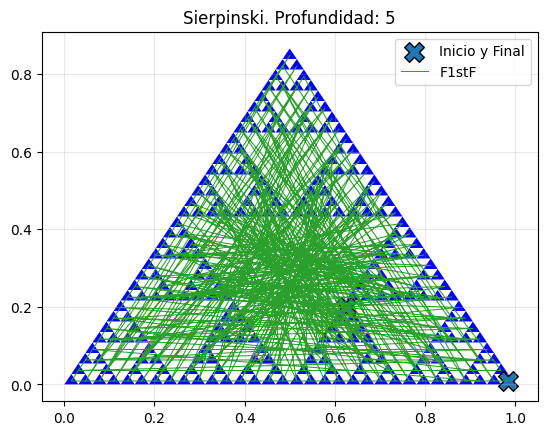

In [15]:
sierpinski_rec(5)